### Extrema
[link to example](https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_extrema.html#sphx-glr-auto-examples-segmentation-plot-extrema-py)

We detect local maxima in a galaxy image. The image is corrupted by noise, generating many local maxima. To keep only those maxima with sufficient local contrast, we use h-maxima.

In [1]:
import matplotlib.pyplot as plt
import skimage

color_image = skimage.data.hubble_deep_field()

# for illustration purposes, we works on a crop of the image
x_0 = 70
y_0 = 354
width = 100
height = 100

img = skimage.color.rgb2gray(color_image)[y_0:(y_0 + height), x_0:(x_0+width)]

# rescaling is done only for visualization purpose.
# The algorithms would work identically in an unscaled version of the image.
# However, the parameter h needs to be adapted to the scale.
img = skimage.exposure.rescale_intensity(img)

c:\Users\AdamSz\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


Maxima detection:

In [2]:
# Maxima in the galaxy image are detected by mathematical morphology.
# There is no a priori constraint on the density.

# We find all local maxima
local_maxima = skimage.morphology.extrema.local_maxima(img)
label_maxima = skimage.measure.label(local_maxima)
overlay = skimage.color.label2rgb(label_maxima, img, alpha=0.7, bg_label=0, bg_color=None, colors=[(1,0,0)])

h = 0.05
h_maxima = skimage.morphology.extrema.h_maxima(img, h)
label_h_maxima = skimage.measure.label(h_maxima)
overlay_h = skimage.color.label2rgb(
    label_h_maxima, img, alpha=0.7, bg_label=0, bg_color=None, colors=[(1,0,0)]
)

Graphical output:

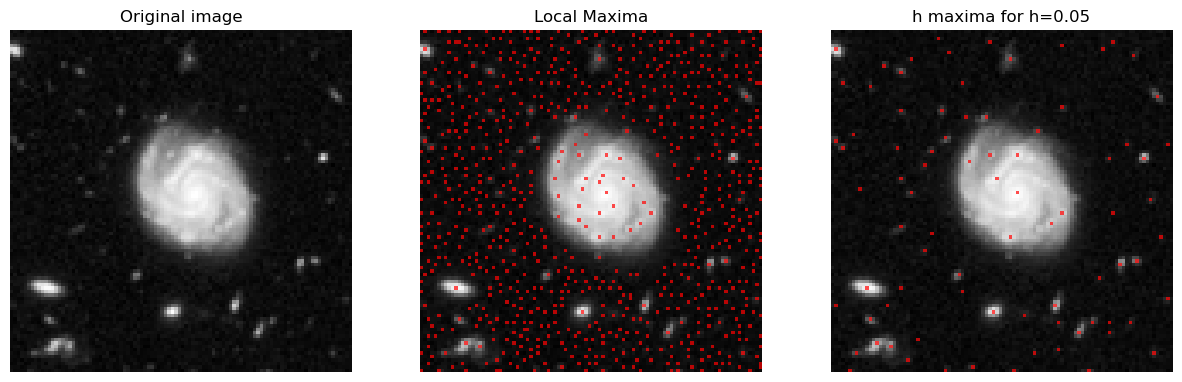

In [3]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original image')
ax[0].axis('off')

ax[1].imshow(overlay)
ax[1].set_title('Local Maxima')
ax[1].axis('off')

ax[2].imshow(overlay_h)
ax[2].set_title(f"h maxima for h={h}")
ax[2].axis('off')
plt.show()